**In this notebook we will be focussing on analyzing textual descriptive features to see what insights we can get from them.**

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## change default settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)


In [12]:
listings_summary  = pd.read_csv('listingssmall.csv')
reviews = pd.read_csv('reviews.csv')

In [13]:
listings_summary.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,12-09-15,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76651,144.98074,Private room,28,4,145,08-04-20,1.50,1,91


In [14]:
print("The dataset has {} rows and {} columns.".format(*listings_summary.shape))

The dataset has 19615 rows and 16 columns.


In [15]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


In [16]:
print("The dataset has {} rows and {} columns.".format(*reviews.shape))

The dataset has 481352 rows and 6 columns.


We can get more valuable information by combining both the dataframes as it can provide useful insights with respect to each listing.

In [17]:
df = pd.merge(listings_summary,reviews,left_on='id',right_on='listing_id',how='left')

In [18]:
df.head(1)


,id_x,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77268,145.09213,Private room,60,1,4,12-09-15,0.03,1,365,9835.0,279854.0,2011-05-24,560832.0,Miriam,"Very hospitable, much appreciated.\r\n"


In [19]:
## dropping duplicate columns
df.drop(['listing_id'],axis=1,inplace=True)

In [20]:
df.columns

Index(['id_x', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'id_y', 'date', 'reviewer_id', 'reviewer_name',
       'comments'],
      dtype='object')

In [21]:
## droppping redundant columns --- of no use to our analysis
df.drop(['host_name','neighbourhood_group','last_review','id_y','reviewer_id','reviewer_name'],axis=1,inplace=True)

In [22]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 485991 rows and 15 columns.


In [23]:
## rename columns
df.rename(columns= {'id_x':'id','name':'title' },inplace=True)

In [15]:
df.head(2)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
0,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n"
1,9835,Beautiful Room & House,33057,Manningham,-37.772684,145.092133,Private room,60,1,4,0.04,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW."


Look whether missing values are present or not

In [26]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 


def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [27]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
comments,4965,1.0
reviews_per_month,4639,1.0
date,4639,1.0
title,18,0.0


In [29]:
!pip install missingno

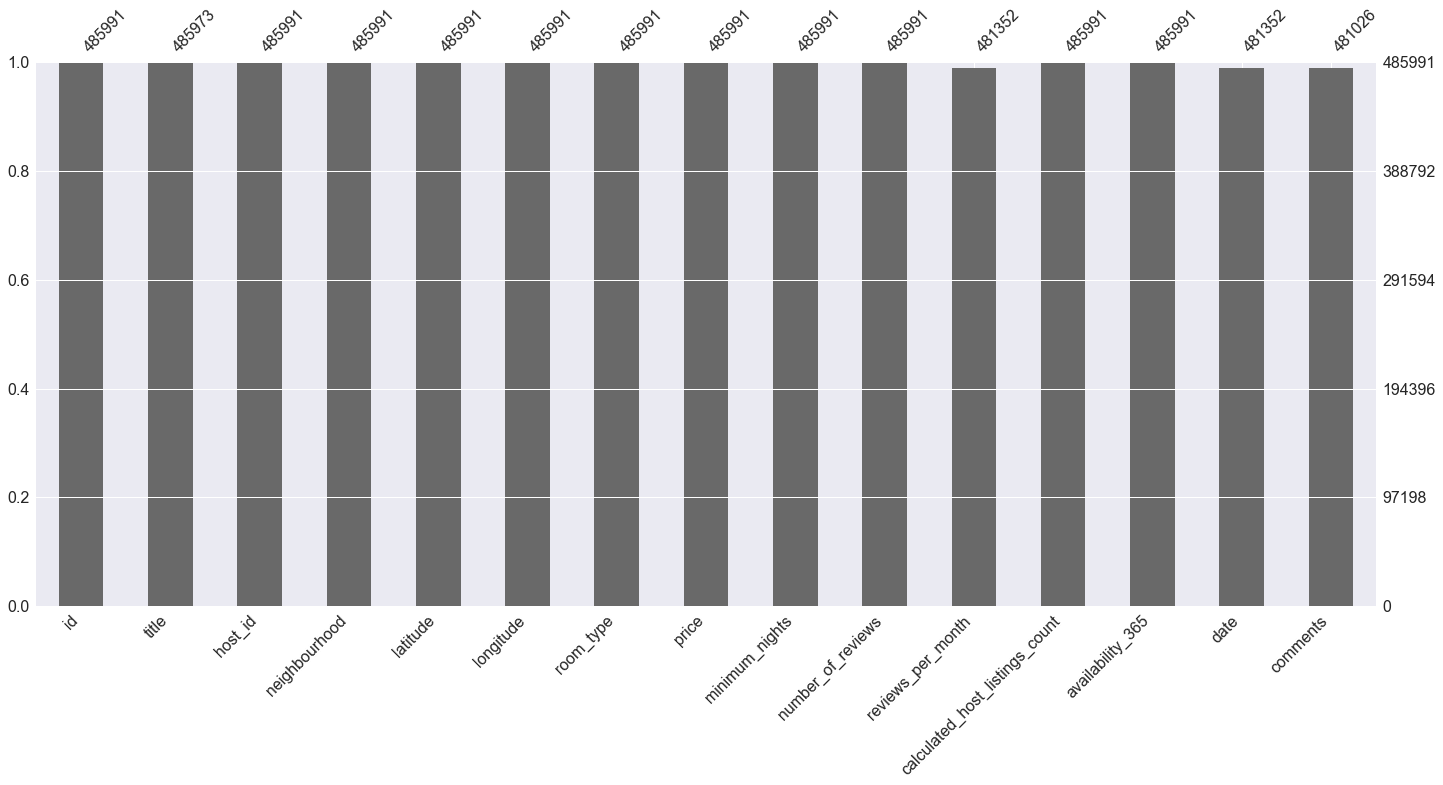

In [30]:
import missingno as msno

msno.bar(df)

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that comments, reviews_per_month,date and title columns have missing values. Next,it would make sense to find out the locations of the missing data.

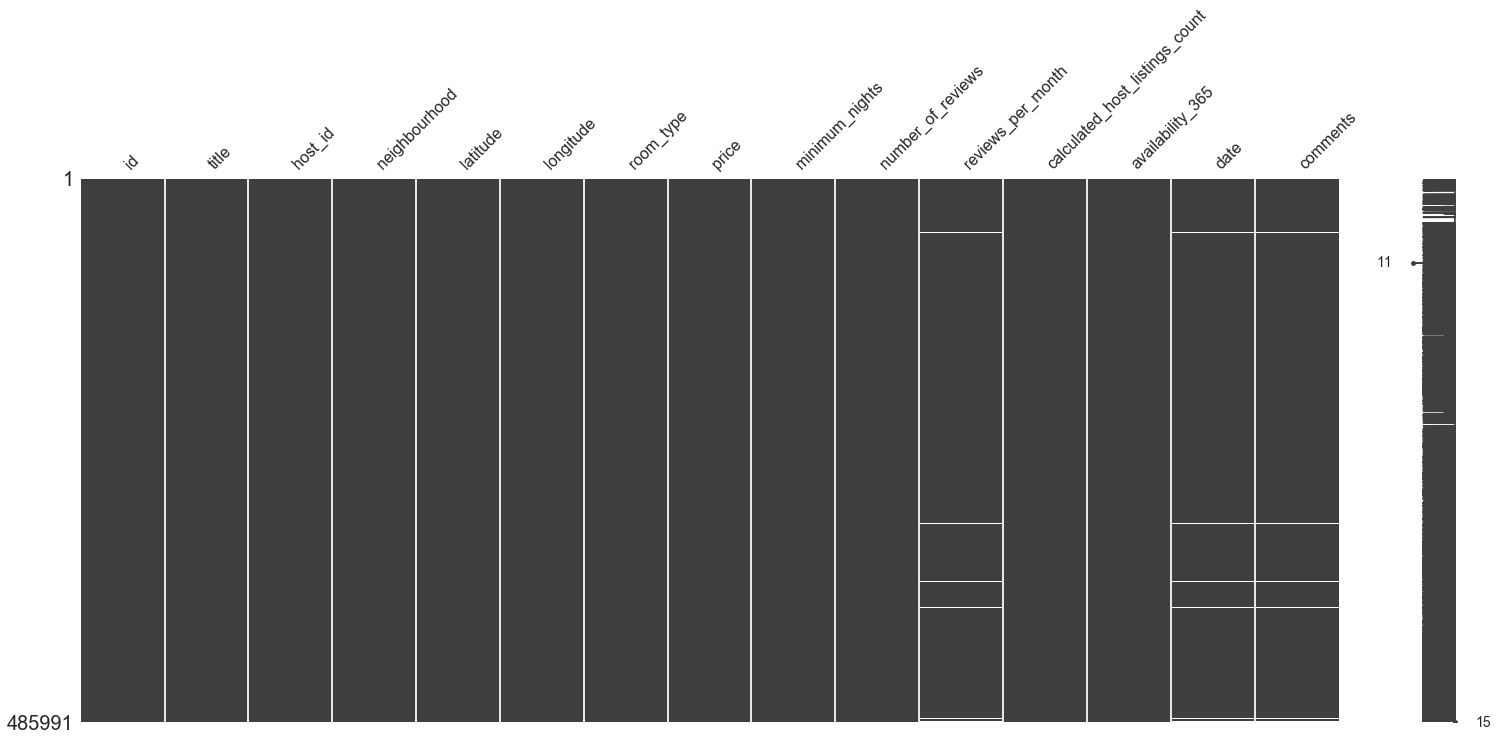

In [31]:
## location of missing values and see we can find any correlation betwen the missing values
msno.matrix(df);

We can these all missing values are highly correlated for all these 4 columns. From above visualization it is quite evident these missing values belongs to the same observations. Since the percentage is pretty low we are going it for now

In [32]:
df.dropna(inplace=True)

In [33]:
df.shape

(481009, 15)

In [34]:
missing= missing_values_table(df)
missing

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Textual analysis

In [43]:
df.sample(1)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments
478109,41091145,YARRA Perfect Location near Toorak Rd & Chapel St,35370298,Stonnington,-37.83942,144.99175,Entire home/apt,170,2,3,0.27,24,227,2020-03-27,Fantastic location - Brilliant place and great hosts \nThanks again


### *Let's first focus on the comment section.*


## In what languages the comment are being made?

In [44]:
!pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993198 sha256=b20a9fdd75c37727a6ec85fc066f4bf2c76968aba6c01aa6b3109985a7eefcd3
  Stored in directory: C:\Users\Kunal\AppData\Local\pip\Cache\wheels\8d\b3\aa\6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [45]:
## credit: https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data/comments

# we use Python's langdetect 
from langdetect import detect

# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [46]:
# %%time
# df['language'] = df['comments'].apply(language_detection)

Wall time: 27min 38s


In [47]:
# write the dataframe to a csv file in order to avoid the long runtime
df.to_csv('processed_df', index=False)


In [48]:
df =pd.read_csv('processed_df')

In [49]:
df.head(2)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language
0,9835,Beautiful Room & House,33057,Manningham,-37.77268,145.09213,Private room,60,1,4,0.03,1,365,2011-05-24,"Very hospitable, much appreciated.\r\n",en
1,9835,Beautiful Room & House,33057,Manningham,-37.77268,145.09213,Private room,60,1,4,0.03,1,365,2013-02-26,"A beautiful house in a lovely quiet neighbourhood, which was only a 5 minute walk to our seminar venue at the Manningham Hotel.Nice parks around for a quick morning walk, buses & shops only a block away. Rate very reasonable too. Manju is a lovely lady who made me feel most welcome & comfortable. Will definitely stay again!\r\nI also recommend Doncaster Shopping Town - WOW.",en


In [50]:
df['language'].value_counts()

en       454071
zh-cn    7625  
ko       4210  
fr       3111  
de       1568  
ro       1530  
so       1018  
af       959   
es       895   
ca       594   
it       527   
ja       466   
nl       461   
tl       332   
cs       272   
pl       214   
zh-tw    213   
no       210   
pt       175   
sw       169   
cy       163   
vi       144   
id       144   
sv       138   
da       136   
hr       128   
hu       123   
fi       114   
et       73    
ru       48    
sk       41    
tr       37    
sl       33    
th       18    
sq       10    
he       4     
el       4     
lv       4     
ar       3     
lt       2     
uk       1     
fa       1     
Name: language, dtype: int64

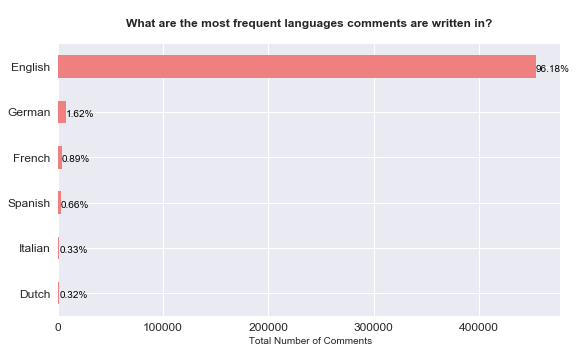

In [51]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

Since almost all the comments are in English, we will focus our analysis on these.

In [52]:
# splitting the dataframes for language 
df_eng = df[(df['language']=='en')]

In [53]:
df_eng['language'].value_counts()

en    454071
Name: language, dtype: int64

## Sentiment analysis of comments

If we can filter out the positive and negative comments we can compare what makes a listing likeable among for the tourist with respect to the the listings that are not liked.

For this we will using `VADER` package

In [56]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kunal\AppData\Roaming\nltk_data...


True

In [57]:
# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()

In [62]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [64]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

Let's now have VADER produce all four scores for each of our English-language comments. As this takes roughly a quarter of an hour, it's a good idea to save the dataframe.

In [65]:
%%time

df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

Wall time: 11min 23s


In [66]:
# write the dataframe to a csv file in order to avoid the long runtime
df_eng.to_csv('sentiment_df_eng', index=False)


In [67]:
df = pd.read_csv('sentiment_df_eng')

In [70]:
df.sample(1)

,id,title,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,comments,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
120071,9263414,Easy Self Check-In | ENSUITE,11111637,Boroondara,-37.80844,145.0991,Private room,30,2,287,4.78,2,0,2019-09-27,"My stay at Wei and Ting's was so peaceful and relaxed. I would recommend it if you are looking for a clean and quiet place to stay, with good amenities and attentive hosts.",en,0.0,0.624,0.376,0.9401


### Percentage distribution of different sentiments

In [75]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    454071.000000
mean     0.828639     
std      0.238329     
min     -0.997100     
5%       0.420100     
10%      0.599400     
20%      0.762000     
30%      0.836000     
40%      0.883400     
50%      0.913600     
60%      0.936000     
70%      0.953100     
80%      0.967200     
90%      0.979700     
max      0.999600     
Name: sentiment_compound, dtype: float64

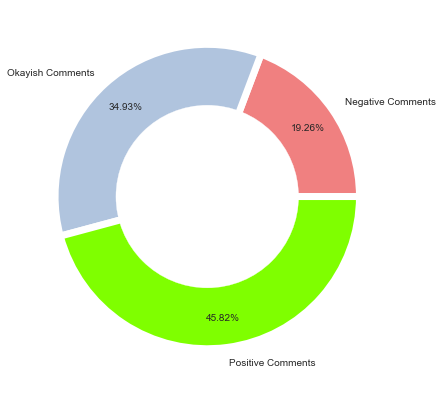

In [81]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

Now let's check how long are the positive comments and negative comments. Is there any difference in their length wrt people opinions

In [84]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()


# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [85]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

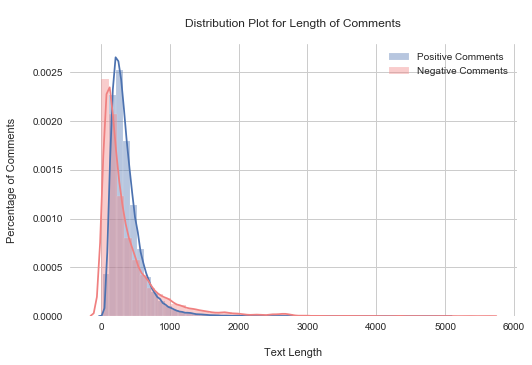

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50)
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

It can be clearly oberve that positive comments seems to be longer than the negative comments if are considereing the mode in our distribution.

## Most frequent words in comment section for all types of sentiments that contributes most to this sentiment

For this task we will be using WordClouds to get insights.


### Positive comments: What people like the most about the listings?

In [88]:
!pip install wordcloud

In [89]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud

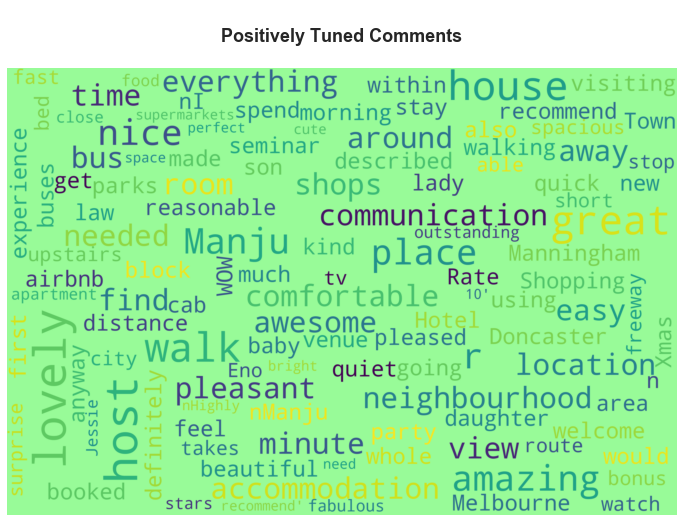

In [90]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()


wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

### Negative comments: What people complain about?

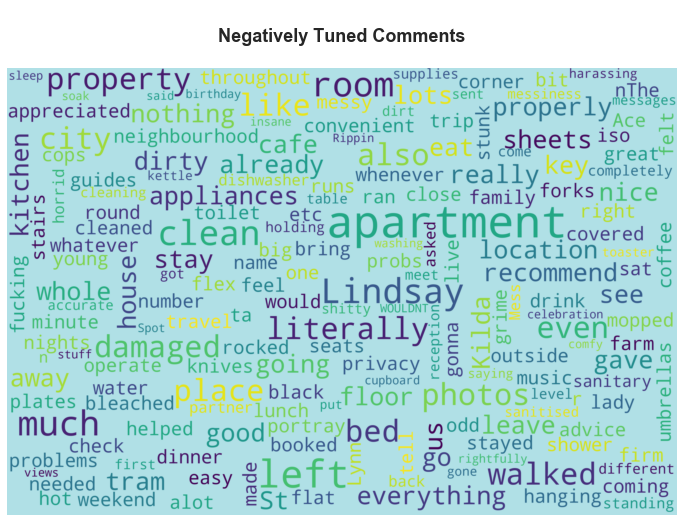

In [91]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="powderblue",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')